# Compare the different scores, cosines, spec2vec and Tanimoto

To compute the differences of similarity algorithms the following filters were used:

Filters:
* normalize_intensities(s)
* select_by_mz(s, mz_from=0, mz_to=1000)
* select_by_relative_intensity(s, intensity_from=0.05, intensity_to=1.0)

In [1]:
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path = os.path.join(os.path.dirname(os.getcwd()), "data")
sys.path.insert(0, ROOT)

## Importing Spec2vec Similarities

### Spec2vec training model params:
- documents=reference_documents
- filename=model_file
- size=400
- iterations=[10, 20, 30]
- workers=2

### spec2vec reference model to compute differences
- model_file = "references_iter_10.model"

In [2]:
import numpy as np 

filename = os.path.join(path, "gcms_similarities_filter05_morgan3_2048_dice.npy")
matrix_similarities_tanimoto = np.load(filename)

In [3]:
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size2.npy")
matrix_similarities_spec2vec2 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size50.npy")
matrix_similarities_spec2vec50 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size100.npy")
matrix_similarities_spec2vec100 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size300.npy")
matrix_similarities_spec2vec300 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size600.npy")
matrix_similarities_spec2vec600 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size650.npy")
matrix_similarities_spec2vec650 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size700.npy")
matrix_similarities_spec2vec700 = np.load(filename)
filename = os.path.join(path, "similarities_filter05_spec2vec_3iter_size800.npy")
matrix_similarities_spec2vec800 = np.load(filename)


In [4]:
# from custom_functions.plotting_functions import plot_precentile

import re
import unidecode
import numpy as np
from matplotlib import pyplot as plt

def plot_precentile(arr_ref, arr_sim, percentile_rn, ignore_diagonal=False):
    
    # function to search and obtain nan elemnts and delete them
    # First checks if the arrays has the same length
    # Then obtaines the indexes of the elements that are not nan of the reference array
    # Then overwrites both arrays without the position on which were nans in the reference array
    def _ignore_reference_nans(arr_ref, arr_sim):
        assert arr_ref.shape == arr_sim.shape, "Expected two arrays of identical shape."
        idx_not_nans = np.where(np.isnan(arr_ref) == False)
        arr_sim = arr_sim[idx_not_nans]
        arr_ref = arr_ref[idx_not_nans]
        return arr_ref, arr_sim

    # If true replace the elements in the diagonal with NaN
    if ignore_diagonal:
        np.fill_diagonal(arr_ref, np.nan)

    # Call to this method to remove the NaN elements from the arrays
    arr_ref, arr_sim = _ignore_reference_nans(arr_ref, arr_sim)

    # Obtain the index position according to the percentile
    start = int(arr_sim.shape[0] * percentile_rn / 100)
    print(percentile_rn)
    idx = np.argpartition(arr_sim, -start)
    starting_point = arr_sim[idx[-start]]
    if starting_point == 0:
        print("not enough datapoints != 0 above given top-precentile")

    # Obtain only the elements on the given percentile
    low_as = np.where(arr_sim == starting_point)[0]

    # Set the length of the array to the length of the new list with the percentile elements
    length_selected = low_as.shape[0]  # start+1

    # Create a new array of zeros where the elements of array_ref and array_sim will be added
    data = np.zeros((2, length_selected))
    # Add arr_sim values to first position and arr_ref to second position
    data[0, :] = arr_sim[low_as]
    data[1, :] = arr_ref[low_as]

    # Order the data according to arr_sim scores
    data = data[:, np.lexsort((data[1, :], data[0, :]))]

    ref_score_cum = []

    # Return mean molecular similarity score of arr_ref 
    return np.mean(data[1, :])

In [13]:
percentile = 0.3

percentile_cosine_spec2vec2 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec2, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec50 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec50, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec100 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec100, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec300 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec300, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec600 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec600, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec650 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec650, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec700 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec700, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec800 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec800, percentile, ignore_diagonal=True)


0.3
0.3
0.3
0.3
0.3
0.3
0.3
0.3


No handles with labels found to put in legend.


[0.0684931506849315,
 0.22727272727272727,
 0.03636363636363636,
 0.030303030303030304,
 0.041666666666666664,
 0.06666666666666667,
 0.26605504587155965,
 0.08333333333333333]

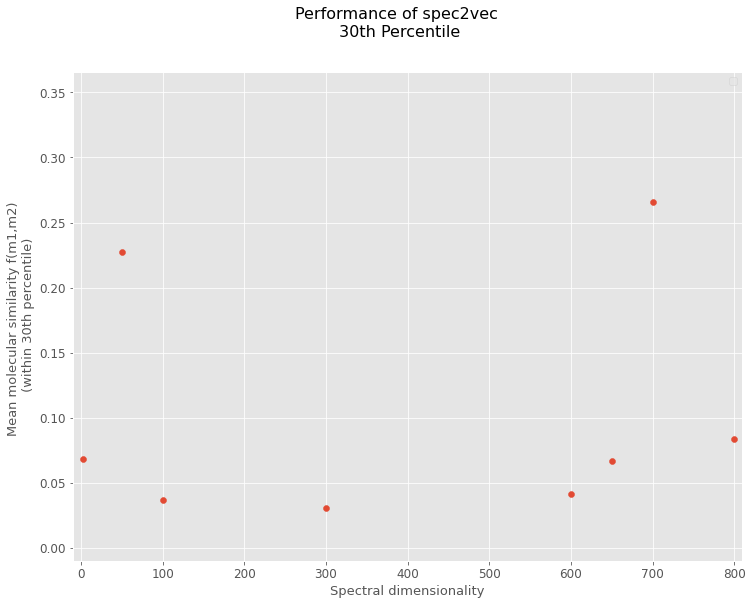

In [14]:
import matplotlib.pyplot as plt

def plot_spec2vec_performance(spec2vec_dimensions, title=None):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(12,9))

    x_dimensions = [2, 50, 100, 300, 600, 650, 700, 800]

    max_score = max(spec2vec_dimensions) + 0.1

    plt.scatter(x_dimensions, spec2vec_dimensions)

    if title is not None:
        plt.suptitle(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.xlabel("Spectral dimensionality", fontsize=13)
    plt.ylabel("Mean molecular similarity f(m1,m2) \n (within 30th percentile)", fontsize=13)
    plt.xlim(-10, 810)
    plt.ylim(-0.01, max_score)

spec2vec_dimensions = [percentile_cosine_spec2vec2, percentile_cosine_spec2vec50, percentile_cosine_spec2vec100, percentile_cosine_spec2vec300, percentile_cosine_spec2vec600, percentile_cosine_spec2vec650, percentile_cosine_spec2vec700, percentile_cosine_spec2vec800]
plot_spec2vec_performance(spec2vec_dimensions, "Performance of spec2vec\n 30th Percentile")

spec2vec_dimensions

In [15]:
percentile = 0.1

percentile_cosine_spec2vec2 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec2, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec50 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec50, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec100 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec100, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec300 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec300, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec600 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec600, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec650 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec650, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec700 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec700, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec800 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec800, percentile, ignore_diagonal=True)


0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1


No handles with labels found to put in legend.


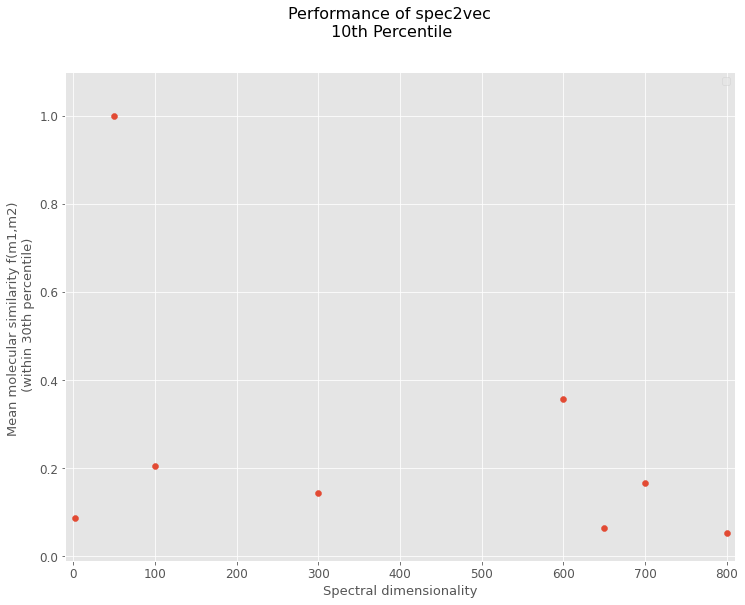

In [16]:

spec2vec_dimensions = [percentile_cosine_spec2vec2, percentile_cosine_spec2vec50, percentile_cosine_spec2vec100, percentile_cosine_spec2vec300, percentile_cosine_spec2vec600, percentile_cosine_spec2vec650, percentile_cosine_spec2vec700, percentile_cosine_spec2vec800]
plot_spec2vec_performance(spec2vec_dimensions, "Performance of spec2vec\n 10th Percentile")


In [17]:
percentile = 0.01

percentile_cosine_spec2vec2 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec2, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec50 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec50, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec100 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec100, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec300 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec300, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec600 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec600, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec650 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec650, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec700 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec700, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec800 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec800, percentile, ignore_diagonal=True)


0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01


No handles with labels found to put in legend.


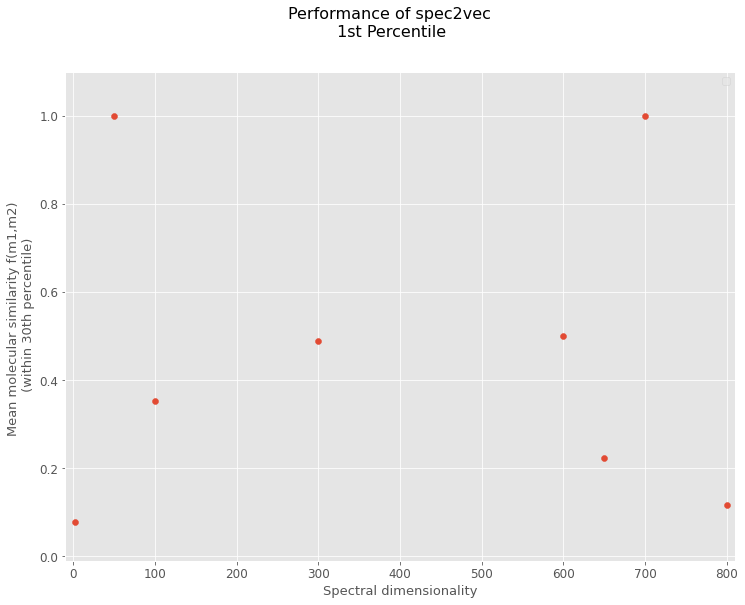

In [18]:

spec2vec_dimensions = [percentile_cosine_spec2vec2, percentile_cosine_spec2vec50, percentile_cosine_spec2vec100, percentile_cosine_spec2vec300, percentile_cosine_spec2vec600, percentile_cosine_spec2vec650, percentile_cosine_spec2vec700, percentile_cosine_spec2vec800]
plot_spec2vec_performance(spec2vec_dimensions, "Performance of spec2vec\n 1st Percentile")


In [19]:
percentile = 0.8

percentile_cosine_spec2vec2 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec2, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec50 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec50, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec100 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec100, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec300 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec300, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec600 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec600, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec650 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec650, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec700 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec700, percentile, ignore_diagonal=True)
percentile_cosine_spec2vec800 = plot_precentile(matrix_similarities_tanimoto, matrix_similarities_spec2vec800, percentile, ignore_diagonal=True)


0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8


No handles with labels found to put in legend.


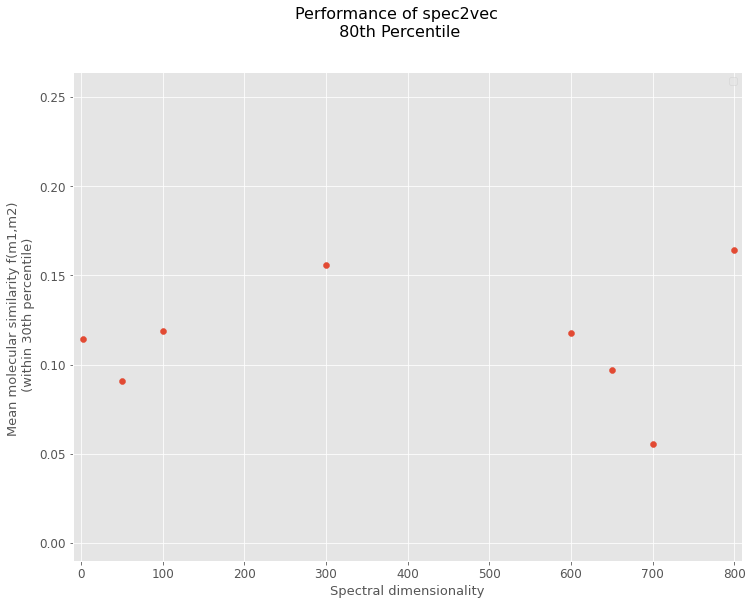

In [20]:

spec2vec_dimensions = [percentile_cosine_spec2vec2, percentile_cosine_spec2vec50, percentile_cosine_spec2vec100, percentile_cosine_spec2vec300, percentile_cosine_spec2vec600, percentile_cosine_spec2vec650, percentile_cosine_spec2vec700, percentile_cosine_spec2vec800]
plot_spec2vec_performance(spec2vec_dimensions, "Performance of spec2vec\n 80th Percentile")
